In [ ]:
import re
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from collections import defaultdict

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('Data')
data.head()

,MDR_REPORT_KEY,DATE_RECEIVED,GENERIC_NAME,MANUFACTURER_D_NAME,MANUFACTURER_D_CITY,MANUFACTURER_D_STATE_CODE,MANUFACTURER_D_POSTAL_CODE,DEVICE_OPERATOR,EXPIRATION_DATE_OF_DEVICE,MODEL_NUMBER,...,COMBINATION_PRODUCT_FLAG,UDI-DI,MDR_TEXT_KEY,TEXT_TYPE_CODE,PATIENT_SEQUENCE_NUMBER,FOI_TEXT,tokens,updated_text,ner_results,QUARTER_DATE_RECEIVED
0,8207400,2019-01-01,IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,"ST. JUDE MEDICAL, INC.",SUNNYVALE,CA,94085,HEALTH PROFESSIONAL,2013-09-30,CD3249-40Q,...,NO,5.414735e+12,131761474,N,1,THE RESULTS OF THE INVESTIGATION ARE INCONCLUS...,"['results', 'investigation', 'inconclusive', '...",{},"[('ANALYSIS', 'PRODUCT'), ('CONCLUSIVELY', 'OR...",2019Q1
1,8207416,2019-01-01,IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,"ST. JUDE MEDICAL, INC.",SYLMAR,CA,91342,HEALTH PROFESSIONAL,2016-06-30,CD3365-40Q,...,NO,5.414735e+12,131761530,N,1,THE RESULTS OF THE INVESTIGATION ARE INCONCLUS...,"['results', 'investigation', 'inconclusive', '...",{},"[('ANALYSIS', 'PRODUCT'), ('CONCLUSIVELY', 'OR...",2019Q1
2,8207424,2019-01-01,IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,"ST. JUDE MEDICAL, INC.",SYLMAR,CA,91342,HEALTH PROFESSIONAL,2015-03-31,CD3265-40Q,...,NO,5.414735e+12,131761374,N,1,THE DEVICE IS INCLUDED IN THE PREMATURE BATTER...,"['included', 'premature', 'battery', 'depletio...","{'Battery problem': ['depletion'], 'Device iss...","[('2016', 'DATE'), ('ANALYSIS', 'PRODUCT'), ('...",2019Q1
3,8208549,2019-01-02,IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,"ST. JUDE MEDICAL, INC.",SYLMAR,CA,91342,HEALTH PROFESSIONAL,2012-10-31,CD2231-40Q,...,NO,5.414735e+12,131793503,N,1,THE DEVICE IS INCLUDED IN THE PREMATURE BATTER...,"['included', 'premature', 'battery', 'depletio...","{'Battery problem': ['depletion'], 'Device iss...","[('11 OCTOBER 2016', 'DATE')]",2019Q1
4,8209283,2019-01-02,IMPLANTABLE PACEMAKER PULSE GENERATOR,"ST. JUDE MEDICAL, INC.",SYLMAR,CA,91342,HEALTH PROFESSIONAL,2012-02-29,5826,...,NO,5.414735e+12,131814304,D,1,THE PATIENT PRESENTED IN THE EMERGENCY ROOM DU...,"['emergency', 'room', 'due', 'ventricular', 'f...","{'Hospitalization': ['emergency', 'admitted']}",[('THE PHYSICIAN ATTEMPTED TO INTERROGATED THE...,2019Q1


In [ ]:
data['adverse_events'] = data['FOI_TEXT'].str.lower()

In [ ]:
data['adverse_events'].dropna(inplace=True)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
custom_stop_words = set(['patient','device','reported','implantable','stable','presented','pacemaker',
                        'defibrillator','cardioverter','condition','performed'])
stop_words = stop_words.union(custom_stop_words)

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
def preprocess_text(text):
    # Tokenize sentences
    sentences = sent_tokenize(text)
    processed_text = []

    for sentence in sentences:
        # Tokenize words
        words = word_tokenize(sentence)
        # Remove special characters, symbols, URLs, punctuations, numbers
        words = [re.sub(r'[^\w\s]', '', word) for word in words if word.isalpha()]
        # Lemmatize words
        words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
        # Filter short and long words
        words = [word for word in words if 1 < len(word) < 20]
        processed_text.extend(words)

    return processed_text

In [ ]:
data['adverse_events']

,adverse_events
0,the results of the investigation are inconclus...
1,the results of the investigation are inconclus...
2,the device is included in the premature batter...
3,the device is included in the premature batter...
4,the patient presented in the emergency room du...
...,...
10384,it was reported that this system with a right ...
10385,it was reported that this implantable cardiove...
10386,it was reported that this subcutaneous implant...
10387,it was reported that this subcutaneous implant...


In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
data['adverse_events'] = data['adverse_events'].apply(preprocess_text)

In [ ]:
adverse_events_keywords = {
   "Discomfort": ["discomfort", "dehiscense", "dyspnea", "fever","vomiting","irritation"],
    "Pain": ["debridement", "wound", "dehiscence", "hematoma", "suffering", "ache","pain"],
    "Hospitalization": ["debridement", "prosthetic", "hospital", "admitted", "hospitalized",
                        "predischarge", "surgeries", "therapy", "emergency"],
    "Sensing": ["noise", "communicating", "disconnected", "oversensing", "threshold", "noisy",
                "undersensed",'loss of capture','capture'],
    "Lead Dislodgement": ["lead dislogement", "electrode", "li"],
    "Device issues": ["charge", "depletion", "impedance", "discharged", "impedances", "drain",
                     "battery performance", "depletion", "short", "circuit", "low amplitude",
                      "electrical discharge", "impedance", "threshold", "drainage", "voltage"],
    "Heart complications": ["endocarditis", "cardiopulmonary", "ischemia", "stroke", "tamponade",
                            "stenosis", "pulse", "bradycardia", "sinus", "resuscitation" ],
    "Organ Impairment": ["debridement", "impairment", "diaphragmatic", "sepsis"],
    "Infection": ["infection", "redness", "bacteremia", "bacterial", "infectious"],
    "Mortality": ["death", "dead"],
    "Bleeding": ["blood", "blood loss", "cut","hematoma"],
    "Surgical Complications": ["dislodgement", "setscrew", "dehiscence"],
    "Lead Fracture": ["lead fracture", "chest discomfort", "syncope",'break'],
    "Dizziness": ["dizziness", "exhausted", "exhaustion", "sluggishness", "syncope"],
    "Mental stress": ["exhaustion", "shock", "anxiety", "fatigue"],
    "Pocket Erosion": ["pocket erosion",'pocket','erosion'],
    "Swelling": ["swelling", "swollen", "redness", "red"],
}

In [ ]:
def keyword_matching(text):
    matched_events = {}
    for event, keywords in adverse_events_keywords.items():
        matches = [word for word in text if word in keywords]
        if matches:
            matched_events[event] = matches
    return matched_events

In [ ]:
data['adverse_events'] = data['adverse_events'].apply(keyword_matching)

In [ ]:
data['adverse_events'].values

array([{}, {}, {'Device issues': ['depletion']}, ...,
       {'Device issues': ['depletion']}, {'Device issues': ['depletion']},
       {'Mental stress': ['shock']}], dtype=object)

In [ ]:
def extract_keys(d):
    return list(d.keys())

In [ ]:
data['occured_events']= data['adverse_events'].apply(extract_keys)

In [ ]:
data['occured_events']

,occured_events
0,[]
1,[]
2,[Device issues]
3,[Device issues]
4,[Hospitalization]
...,...
10384,"[Device issues, Mental stress]"
10385,"[Sensing, Pocket Erosion]"
10386,[Device issues]
10387,[Device issues]


In [ ]:
def count_events(data):
    return len(data)

In [ ]:
data['no of events'] = data['occured_events'].apply(count_events)

In [ ]:
data['no of events']

,no of events
0,0
1,0
2,1
3,1
4,1
...,...
10384,2
10385,2
10386,1
10387,1


In [ ]:
event_counts = defaultdict(int)
for i in data['adverse_events']:
    for event in i.keys():
        event_counts[event] += 1

In [ ]:
event_counts

defaultdict(int,
            {'Device issues': 2269,
             'Hospitalization': 1194,
             'Discomfort': 150,
             'Lead Dislodgement': 116,
             'Sensing': 2757,
             'Infection': 815,
             'Pocket Erosion': 561,
             'Mortality': 147,
             'Mental stress': 885,
             'Pain': 132,
             'Organ Impairment': 32,
             'Bleeding': 303,
             'Heart complications': 289,
             'Surgical Complications': 100,
             'Swelling': 107,
             'Dizziness': 222,
             'Lead Fracture': 93})

In [ ]:
total_reports = len(data)
event_freq = { event: round(count/total_reports * 100,2) for event,count in event_counts.items()}

In [ ]:
event_freq

{'Device issues': 21.84,
 'Hospitalization': 11.49,
 'Discomfort': 1.44,
 'Lead Dislodgement': 1.12,
 'Sensing': 26.54,
 'Infection': 7.84,
 'Pocket Erosion': 5.4,
 'Mortality': 1.41,
 'Mental stress': 8.52,
 'Pain': 1.27,
 'Organ Impairment': 0.31,
 'Bleeding': 2.92,
 'Heart complications': 2.78,
 'Surgical Complications': 0.96,
 'Swelling': 1.03,
 'Dizziness': 2.14,
 'Lead Fracture': 0.9}

In [ ]:
freq = {'Events':event_freq.keys(),
       'Frequency':event_freq.values()}

In [ ]:
event_freq_df = pd.DataFrame(freq,index=None)
event_freq_df

,Events,Frequency
0,Device issues,21.84
1,Hospitalization,11.49
2,Discomfort,1.44
3,Lead Dislodgement,1.12
4,Sensing,26.54
5,Infection,7.84
6,Pocket Erosion,5.40
7,Mortality,1.41
8,Mental stress,8.52
9,Pain,1.27


In [ ]:
summary_df_sorted = event_freq_df.sort_values(by='Frequency', ascending=False)
summary_df_sorted

,Events,Frequency
4,Sensing,26.54
0,Device issues,21.84
1,Hospitalization,11.49
8,Mental stress,8.52
5,Infection,7.84
6,Pocket Erosion,5.40
11,Bleeding,2.92
12,Heart complications,2.78
15,Dizziness,2.14
2,Discomfort,1.44


In [ ]:
import seaborn as sns

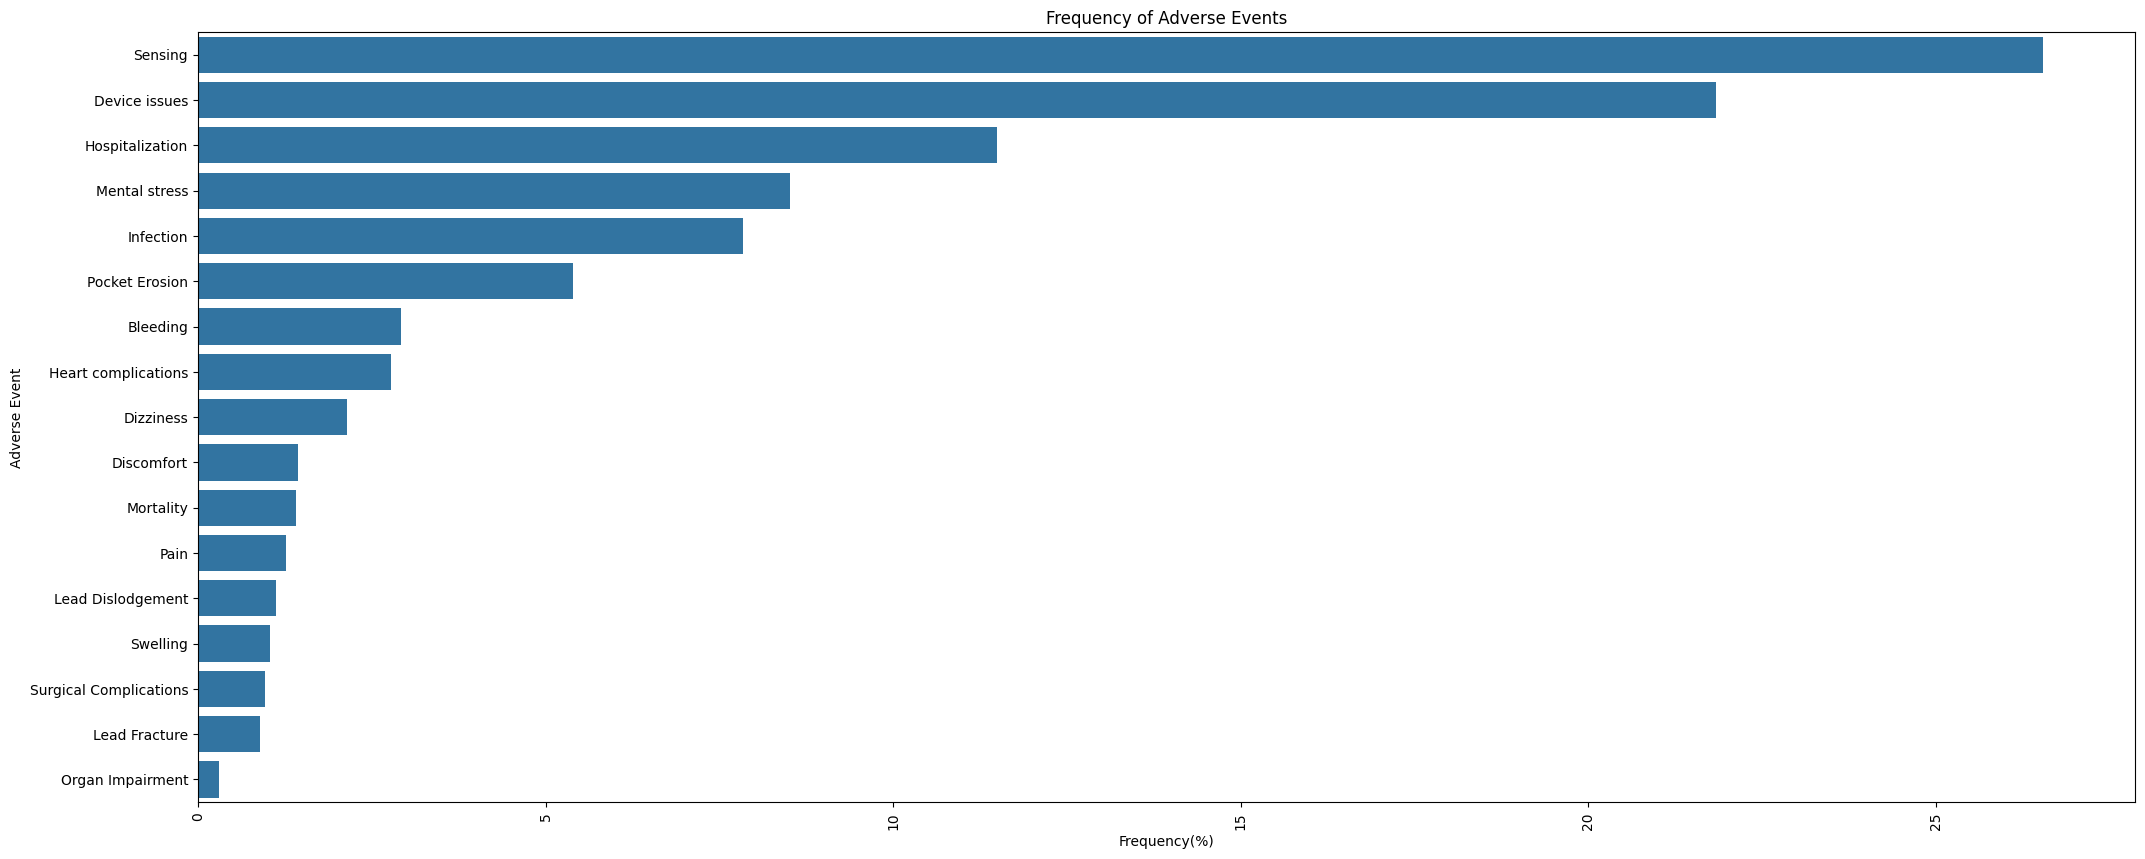

In [ ]:
plt.figure(figsize=(25, 10))
sns.barplot(data=summary_df_sorted, x='Frequency', y='Events',orient='h')
plt.xticks(rotation=90)
plt.xlabel('Frequency(%)')
plt.ylabel('Adverse Event')
plt.title('Frequency of Adverse Events')
plt.show()

In [ ]:
data[['adverse_events','occured_events','no of events']]

,adverse_events,occured_events,no of events
0,{},[],0
1,{},[],0
2,{'Device issues': ['depletion']},[Device issues],1
3,{'Device issues': ['depletion']},[Device issues],1
4,"{'Hospitalization': ['emergency', 'admitted']}",[Hospitalization],1
...,...,...,...
10384,"{'Device issues': ['impedance', 'impedance'], ...","[Device issues, Mental stress]",2
10385,"{'Sensing': ['noise', 'oversensing', 'noise', ...","[Sensing, Pocket Erosion]",2
10386,{'Device issues': ['depletion']},[Device issues],1
10387,{'Device issues': ['depletion']},[Device issues],1


In [ ]:
severity_weights = {
    "Discomfort": 1,
    "Pain": 3,
    "Hospitalization": 4,
    'Sensing': 3,
    "Lead Dislodgement": 4,
    "Device issues": 4,
    "Heart complications": 5,
    "Organ Impairment": 5,
    "Infection": 3,
    "Mortality": 5,
    "Bleeding": 3,
    "Surgical Complications": 5,
    "Lead Fracture": 5,
    "Dizziness": 2,
    "Mental stress": 2,
    "Pocket Erosion": 3,
    "Swelling": 2,
}

In [ ]:
def calculate_score(events):
    if not events:
        return 0
    total_score = 0
    for i in events:
        freq=event_freq.get(i,0)
        weight = severity_weights.get(i,0)
        total_score += freq*weight
    return round(total_score/total_reports,3)

In [ ]:
data['OSI_score'] = data['occured_events'].apply(calculate_score)
data['OSI_score']

,OSI_score
0,0.000
1,0.000
2,0.008
3,0.008
4,0.004
...,...
10384,0.010
10385,0.009
10386,0.008
10387,0.008


In [ ]:
score_value_count = data['OSI_score'].value_counts()

In [ ]:
score_value_count=score_value_count.sort_index(ascending=False)

In [ ]:
score_value_count

,count
OSI_score,
0.024,1
0.023,7
0.022,23
0.021,14
0.020,35
0.019,1
0.018,73
0.017,28
0.016,244


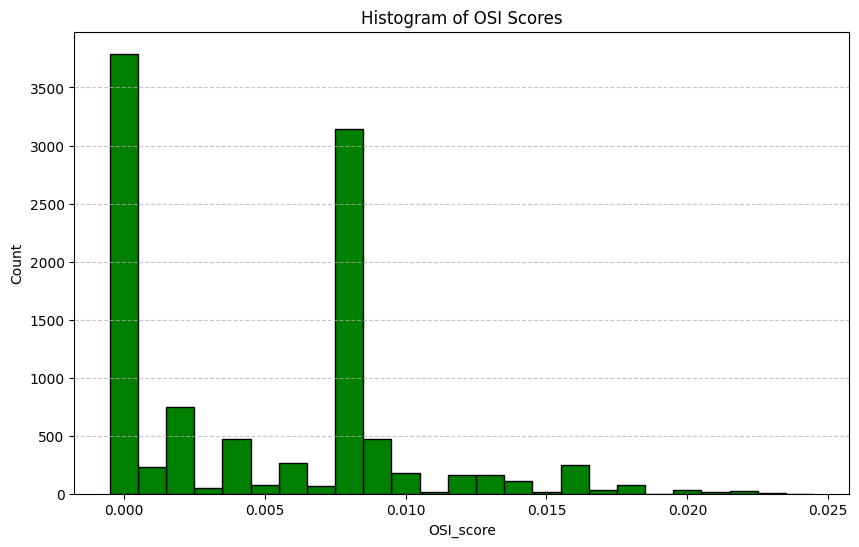

In [ ]:
score_data = {
    'OSI_score': score_value_count.index,
    'count': score_value_count.values
}

df = pd.DataFrame(data)
plt.figure(figsize=(10, 6))
plt.bar(score_data['OSI_score'], score_data['count'], width=0.001, color='green', edgecolor='black')
plt.xlabel('OSI_score')
plt.ylabel('Count')
plt.title('Histogram of OSI Scores')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
def label_allocation(score):
    if 0<=score<=0.006:
        return "Mild"
    elif 0.006<score<=0.012:
        return "Moderate"
    elif 0.012<score<=0.016:
        return "Severe"
    elif score>0.016:
        return "Fatal"

In [ ]:
data['labels'] = data['OSI_score'].apply(label_allocation)
data['labels']

,labels
0,Mild
1,Mild
2,Moderate
3,Moderate
4,Mild
...,...
10384,Moderate
10385,Moderate
10386,Moderate
10387,Moderate


In [ ]:
data[['occured_events','no of events','OSI_score','labels']]

,occured_events,no of events,OSI_score,labels
0,[],0,0.000,Mild
1,[],0,0.000,Mild
2,[Device issues],1,0.008,Moderate
3,[Device issues],1,0.008,Moderate
4,[Hospitalization],1,0.004,Mild
...,...,...,...,...
10384,"[Device issues, Mental stress]",2,0.010,Moderate
10385,"[Sensing, Pocket Erosion]",2,0.009,Moderate
10386,[Device issues],1,0.008,Moderate
10387,[Device issues],1,0.008,Moderate


In [ ]:
y = data['labels'].value_counts().values
x = data['labels'].value_counts().index

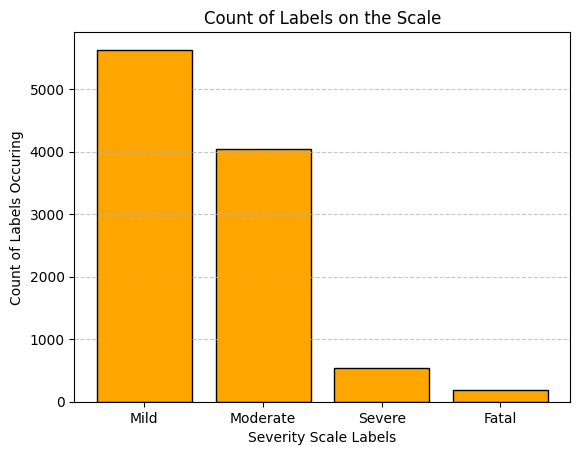

In [ ]:
plt.bar(x,y,color='orange',edgecolor='black')
plt.title("Count of Labels on the Scale")
plt.xlabel('Severity Scale Labels')
plt.ylabel('Count of Labels Occuring')
plt.grid(axis='y',linestyle='--',alpha=0.7)

In [ ]:
updated_data = data[['GENERIC_NAME','MANUFACTURER_D_NAME','MANUFACTURER_D_STATE_CODE',
          'DEVICE_OPERATOR','MODEL_NUMBER','DEVICE_EVALUATED_BY_MANUFACTUR','DEVICE_REPORT_PRODUCT_CODE',
        'no of events','labels'
         ]]

In [ ]:
updated_data.head()

,GENERIC_NAME,MANUFACTURER_D_NAME,MANUFACTURER_D_STATE_CODE,DEVICE_OPERATOR,MODEL_NUMBER,DEVICE_EVALUATED_BY_MANUFACTUR,DEVICE_REPORT_PRODUCT_CODE,no of events,labels
0,IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,"ST. JUDE MEDICAL, INC.",CA,HEALTH PROFESSIONAL,CD3249-40Q,NOT RETURNED,NIK,0,Mild
1,IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,"ST. JUDE MEDICAL, INC.",CA,HEALTH PROFESSIONAL,CD3365-40Q,YES,NIK,0,Mild
2,IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,"ST. JUDE MEDICAL, INC.",CA,HEALTH PROFESSIONAL,CD3265-40Q,YES,NIK,1,Moderate
3,IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,"ST. JUDE MEDICAL, INC.",CA,HEALTH PROFESSIONAL,CD2231-40Q,YES,NVZ,1,Moderate
4,IMPLANTABLE PACEMAKER PULSE GENERATOR,"ST. JUDE MEDICAL, INC.",CA,HEALTH PROFESSIONAL,5826,YES,LWP,1,Mild


In [ ]:
## RandomForest Classifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
le = LabelEncoder()
updated_data['GENERIC_NAME'] = le.fit_transform(data['GENERIC_NAME'])
updated_data['MANUFACTURER_D_NAME'] = le.fit_transform(data['MANUFACTURER_D_NAME'])
updated_data['MANUFACTURER_D_STATE_CODE'] = le.fit_transform(data['MANUFACTURER_D_STATE_CODE'])
updated_data['DEVICE_OPERATOR'] = le.fit_transform(data['DEVICE_OPERATOR'])
updated_data['MODEL_NUMBER'] = le.fit_transform(data['MODEL_NUMBER'])
updated_data['DEVICE_EVALUATED_BY_MANUFACTUR'] = le.fit_transform(data['DEVICE_EVALUATED_BY_MANUFACTUR'])
updated_data['DEVICE_REPORT_PRODUCT_CODE'] = le.fit_transform(data['DEVICE_REPORT_PRODUCT_CODE'])

<ipython-input-51-5002e616deca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_data['GENERIC_NAME'] = le.fit_transform(data['GENERIC_NAME'])
<ipython-input-51-5002e616deca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_data['MANUFACTURER_D_NAME'] = le.fit_transform(data['MANUFACTURER_D_NAME'])
<ipython-input-51-5002e616deca>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [ ]:
X = updated_data[['GENERIC_NAME', 'MANUFACTURER_D_NAME', 'MANUFACTURER_D_STATE_CODE',
       'DEVICE_OPERATOR', 'MODEL_NUMBER', 'DEVICE_EVALUATED_BY_MANUFACTUR',
       'DEVICE_REPORT_PRODUCT_CODE', 'no of events']]
y = updated_data['labels']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Fatal       0.42      0.29      0.34        38
        Mild       0.86      0.79      0.82      1122
    Moderate       0.76      0.85      0.80       816
      Severe       0.35      0.34      0.35       102

    accuracy                           0.78      2078
   macro avg       0.60      0.57      0.58      2078
weighted avg       0.79      0.78      0.78      2078



In [ ]:
#true_labels = le.inverse_transform(y_test)
#predicted_labels = le.inverse_transform(y_pred)

In [ ]:
true_labels = y_test
predicted_labels = y_pred

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score

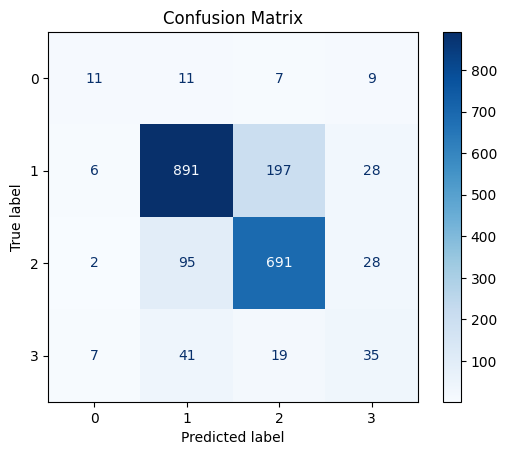

In [ ]:
conf_matrix = confusion_matrix(true_labels, predicted_labels)
ConfusionMatrixDisplay(conf_matrix).plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 78.34%


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
model

RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Random Forest Classifier":RandomForestClassifier()
}

# Train and evaluate each model
l = []
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    l.append({model_name :accuracy_score(y_test,y_pred)})

    # Evaluate the model
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))
print(l)


Logistic Regression Classification Report:
              precision    recall  f1-score   support

       Fatal       0.36      0.32      0.34        38
        Mild       0.77      0.79      0.78      1122
    Moderate       0.62      0.66      0.64       816
      Severe       0.39      0.12      0.18       102

    accuracy                           0.70      2078
   macro avg       0.54      0.47      0.48      2078
weighted avg       0.69      0.70      0.69      2078


SVM Classification Report:
              precision    recall  f1-score   support

       Fatal       0.39      0.24      0.30        38
        Mild       0.87      0.76      0.81      1122
    Moderate       0.71      0.86      0.78       816
      Severe       0.36      0.30      0.33       102

    accuracy                           0.77      2078
   macro avg       0.58      0.54      0.55      2078
weighted avg       0.77      0.77      0.77      2078


Random Forest Classifier Classification Report:
         

In [ ]:
## Random Forest Classifer by far is giving the best result for accuracy

In [ ]:
RFC_model = model

In [ ]:
# Evaluation Metrics for RandomForest Classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.7795957651588066
Precision (macro): 0.5842997542997542
Recall (macro): 0.5471227366544704
F1 Score (macro): 0.5589183968686648


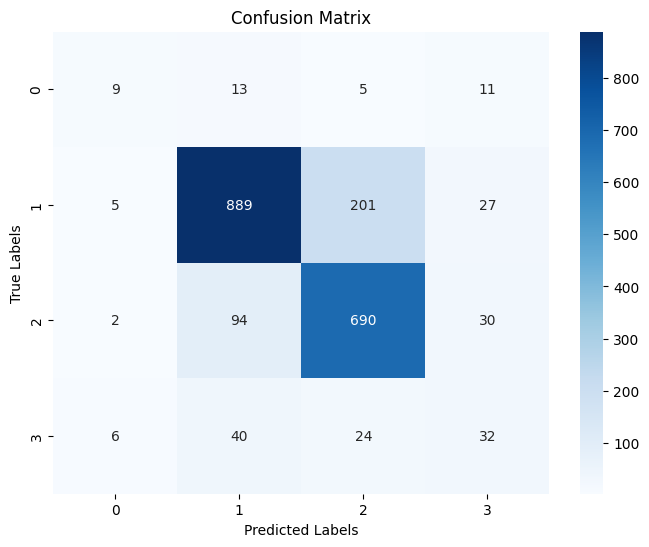

In [ ]:
## Confusion Matrix
conf_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
# ROC-AUC Score (for binary classification)
if len(model.classes_) == 2:  # Check if binary classification
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of the positive class
    print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

In [ ]:
RFC_model.classes_

array(['Fatal', 'Mild', 'Moderate', 'Severe'], dtype=object)

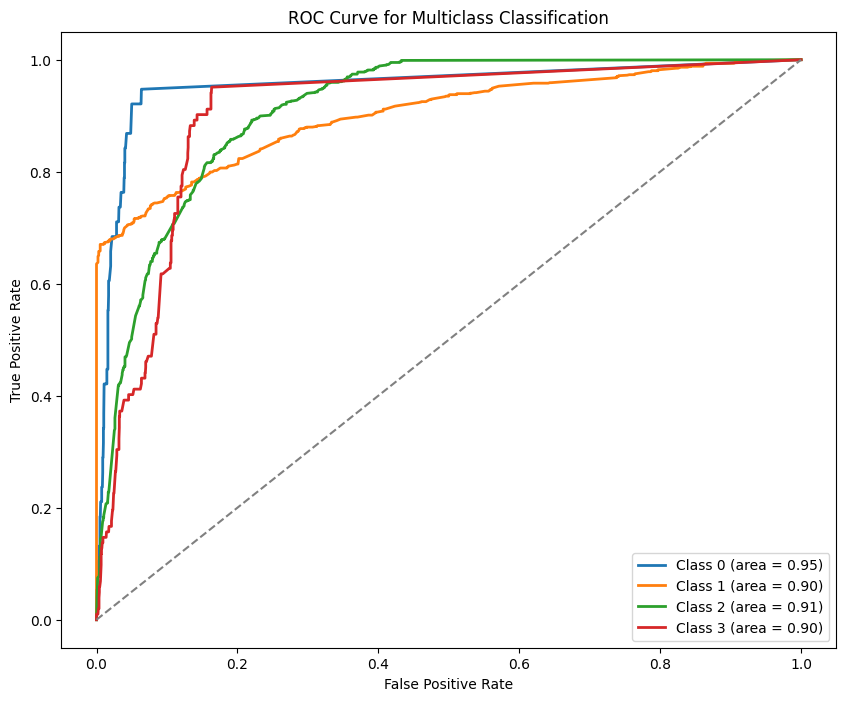

Macro-average ROC-AUC: 0.92


In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import numpy as np

# Binarize the labels for one-vs-rest ROC calculation
y_test_binarized = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_binarized.shape[1]

# Get probability estimates from the model for each class
y_pred_proba = model.predict_proba(X_test)

# Plotting the ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (area = {roc_auc:.2f})')

# Plotting the diagonal line for random chance
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc="lower right")
plt.show()

# Calculate the macro-average ROC-AUC
macro_roc_auc = roc_auc_score(y_test_binarized, y_pred_proba, average="macro")
print(f"Macro-average ROC-AUC: {macro_roc_auc:.2f}")

In [ ]:
## Hyper-parameter Tunning in RandomForestClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],        # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],        # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],        # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],          # Minimum samples required to be at a leaf node
    'bootstrap': [True, False]              # Whether bootstrap samples are used
}

In [ ]:
rf = RandomForestClassifier()

In [ ]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-Validation Score: 0.7762000589021479


In [ ]:
best_rf = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Fatal       0.31      0.11      0.16        38
        Mild       0.85      0.80      0.83      1122
    Moderate       0.73      0.86      0.79       816
      Severe       0.41      0.19      0.26       102

    accuracy                           0.78      2078
   macro avg       0.58      0.49      0.51      2078
weighted avg       0.77      0.78      0.77      2078



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution for RandomizedSearch
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False]
}

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=50, cv=5, n_jobs=-1,
                                   verbose=2, scoring='accuracy', random_state=42)

# Fit RandomizedSearchCV to the data
random_search.fit(X_train, y_train)

# Best parameters and model performance
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)

# Use the best estimator
best_rf = random_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 330}
Best Cross-Validation Score: 0.7755984465463007
              precision    recall  f1-score   support

       Fatal       0.30      0.08      0.12        38
        Mild       0.85      0.80      0.82      1122
    Moderate       0.72      0.86      0.78       816
      Severe       0.38      0.15      0.21       102

    accuracy                           0.78      2078
   macro avg       0.56      0.47      0.49      2078
weighted avg       0.77      0.78      0.77      2078



In [ ]:
y_test.value_counts()

,count
labels,
Mild,1122
Moderate,816
Severe,102
Fatal,38


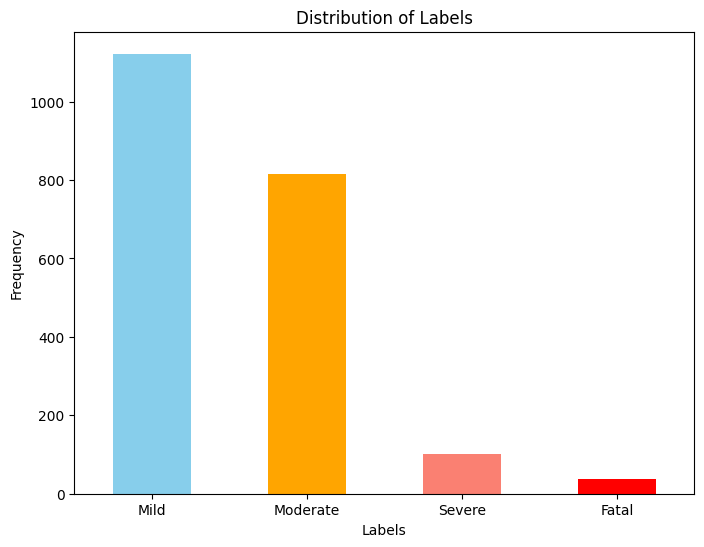

In [ ]:
plt.figure(figsize=(8, 6))
y_test.value_counts().plot(kind='bar', color=['skyblue', 'orange', 'salmon','red'])
plt.title("Distribution of Labels")
plt.xlabel("Labels")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()

In [ ]:
type(y_test)

pandas.core.series.Series

In [ ]:
y_pred = pd.Series(y_pred)

In [ ]:
y_pred.value_counts()

,count
Mild,1059
Moderate,970
Severe,39
Fatal,10


In [ ]:
import seaborn as sns

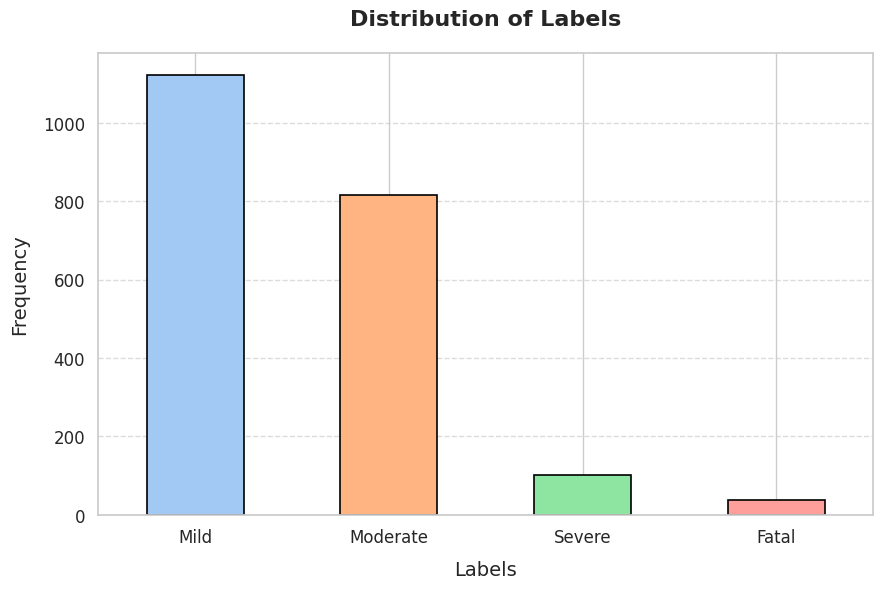

In [ ]:
sns.set_theme(style="whitegrid")

# Create the figure and axes
plt.figure(figsize=(10, 6))

# Enhanced color palette
colors = sns.color_palette("pastel", 4)

# Plot the data with better colors and visual adjustments
y_test.value_counts().plot(
    kind='bar',
    color=colors,
    edgecolor='black',
    linewidth=1.2
)

# Add title and labels with improved formatting
plt.title("Distribution of Labels", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Labels", fontsize=14, labelpad=10)
plt.ylabel("Frequency", fontsize=14, labelpad=10)

# Customize ticks
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Add a grid for y-axis only
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

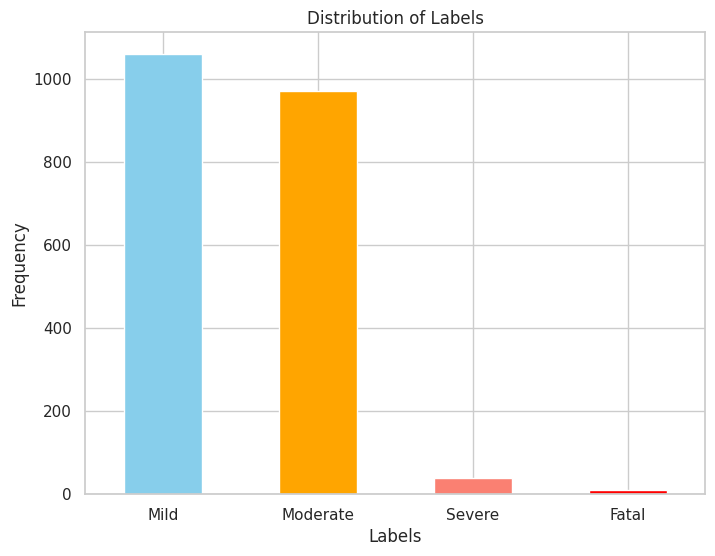

In [ ]:
plt.figure(figsize=(8, 6))
y_pred.value_counts().plot(kind='bar', color=['skyblue', 'orange', 'salmon','red'])
plt.title("Distribution of Labels")
plt.xlabel("Labels")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()

In [ ]:
data.columns

Index(['MDR_REPORT_KEY', 'DATE_RECEIVED', 'GENERIC_NAME',
       'MANUFACTURER_D_NAME', 'MANUFACTURER_D_CITY',
       'MANUFACTURER_D_STATE_CODE', 'MANUFACTURER_D_POSTAL_CODE',
       'DEVICE_OPERATOR', 'EXPIRATION_DATE_OF_DEVICE', 'MODEL_NUMBER',
       'LOT_NUMBER', 'DEVICE_AVAILABILITY', 'DEVICE_REPORT_PRODUCT_CODE',
       'DEVICE_EVALUATED_BY_MANUFACTUR', 'COMBINATION_PRODUCT_FLAG', 'UDI-DI',
       'MDR_TEXT_KEY', 'TEXT_TYPE_CODE', 'PATIENT_SEQUENCE_NUMBER', 'FOI_TEXT',
       'tokens', 'updated_text', 'ner_results', 'QUARTER_DATE_RECEIVED',
       'adverse_events', 'occured_events', 'no of events', 'OSI_score',
       'labels'],
      dtype='object')

In [ ]:
updated_data.columns

Index(['GENERIC_NAME', 'MANUFACTURER_D_NAME', 'MANUFACTURER_D_STATE_CODE',
       'DEVICE_OPERATOR', 'MODEL_NUMBER', 'DEVICE_EVALUATED_BY_MANUFACTUR',
       'DEVICE_REPORT_PRODUCT_CODE', 'no of events', 'labels'],
      dtype='object')

In [ ]:
data.head(5)

,MDR_REPORT_KEY,DATE_RECEIVED,GENERIC_NAME,MANUFACTURER_D_NAME,MANUFACTURER_D_CITY,MANUFACTURER_D_STATE_CODE,MANUFACTURER_D_POSTAL_CODE,DEVICE_OPERATOR,EXPIRATION_DATE_OF_DEVICE,MODEL_NUMBER,...,FOI_TEXT,tokens,updated_text,ner_results,QUARTER_DATE_RECEIVED,adverse_events,occured_events,no of events,OSI_score,labels
0,8207400,2019-01-01,IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,"ST. JUDE MEDICAL, INC.",SUNNYVALE,CA,94085,HEALTH PROFESSIONAL,2013-09-30,CD3249-40Q,...,THE RESULTS OF THE INVESTIGATION ARE INCONCLUS...,"['results', 'investigation', 'inconclusive', '...",{},"[('ANALYSIS', 'PRODUCT'), ('CONCLUSIVELY', 'OR...",2019Q1,{},[],0,0.000,Mild
1,8207416,2019-01-01,IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,"ST. JUDE MEDICAL, INC.",SYLMAR,CA,91342,HEALTH PROFESSIONAL,2016-06-30,CD3365-40Q,...,THE RESULTS OF THE INVESTIGATION ARE INCONCLUS...,"['results', 'investigation', 'inconclusive', '...",{},"[('ANALYSIS', 'PRODUCT'), ('CONCLUSIVELY', 'OR...",2019Q1,{},[],0,0.000,Mild
2,8207424,2019-01-01,IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,"ST. JUDE MEDICAL, INC.",SYLMAR,CA,91342,HEALTH PROFESSIONAL,2015-03-31,CD3265-40Q,...,THE DEVICE IS INCLUDED IN THE PREMATURE BATTER...,"['included', 'premature', 'battery', 'depletio...","{'Battery problem': ['depletion'], 'Device iss...","[('2016', 'DATE'), ('ANALYSIS', 'PRODUCT'), ('...",2019Q1,{'Device issues': ['depletion']},[Device issues],1,0.008,Moderate
3,8208549,2019-01-02,IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,"ST. JUDE MEDICAL, INC.",SYLMAR,CA,91342,HEALTH PROFESSIONAL,2012-10-31,CD2231-40Q,...,THE DEVICE IS INCLUDED IN THE PREMATURE BATTER...,"['included', 'premature', 'battery', 'depletio...","{'Battery problem': ['depletion'], 'Device iss...","[('11 OCTOBER 2016', 'DATE')]",2019Q1,{'Device issues': ['depletion']},[Device issues],1,0.008,Moderate
4,8209283,2019-01-02,IMPLANTABLE PACEMAKER PULSE GENERATOR,"ST. JUDE MEDICAL, INC.",SYLMAR,CA,91342,HEALTH PROFESSIONAL,2012-02-29,5826,...,THE PATIENT PRESENTED IN THE EMERGENCY ROOM DU...,"['emergency', 'room', 'due', 'ventricular', 'f...","{'Hospitalization': ['emergency', 'admitted']}",[('THE PHYSICIAN ATTEMPTED TO INTERROGATED THE...,2019Q1,"{'Hospitalization': ['emergency', 'admitted']}",[Hospitalization],1,0.004,Mild


In [ ]:
time_data = data[['DATE_RECEIVED','GENERIC_NAME', 'MANUFACTURER_D_NAME', 'MANUFACTURER_D_STATE_CODE',
       'DEVICE_OPERATOR', 'MODEL_NUMBER', 'DEVICE_EVALUATED_BY_MANUFACTUR',
       'DEVICE_REPORT_PRODUCT_CODE', 'no of events', 'labels']]

In [ ]:
time_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10389 entries, 0 to 10388
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   DATE_RECEIVED                   10389 non-null  object
 1   GENERIC_NAME                    10389 non-null  object
 2   MANUFACTURER_D_NAME             10389 non-null  object
 3   MANUFACTURER_D_STATE_CODE       10389 non-null  object
 4   DEVICE_OPERATOR                 10389 non-null  object
 5   MODEL_NUMBER                    10389 non-null  object
 6   DEVICE_EVALUATED_BY_MANUFACTUR  10389 non-null  object
 7   DEVICE_REPORT_PRODUCT_CODE      10389 non-null  object
 8   no of events                    10389 non-null  int64 
 9   labels                          10389 non-null  object
dtypes: int64(1), object(9)
memory usage: 811.8+ KB
